In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
def FillNaMean(df, columns_names):
    for name in columns_names:
        df[name].fillna(df[name].mean(),inplace=True) 

data = pd.read_csv("kicksharing.csv")

change_columns = ["loyalty_accrual_rub_amt", "nominal_price_rub_amt", "minute_cost", "activation_cost", "distance_km"]
FillNaMean(data, change_columns)
data["local_book_start_dttm"] = pd.to_datetime(data["local_book_start_dttm"])
data.T

,0,1,2,3,4,5,6,7,8,9,...,396739,396740,396741,396742,396743,396744,396745,396746,396747,396748
order_rk,266071307,355113920,347424551,351562959,258647149,277397094,273528957,265062394,351562880,269365210,...,270153398,260757716,351842959,349389313,255494914,349109813,348829245,273529251,306062051,262579355
party_rk,761067705,614049469,757583701,541367366,238473615,5247768,801272780,866880584,762053500,161703813,...,582261017,696224457,643856287,643856287,377087978,755778419,1146263947,1012601147,863877659,897372192
gender_cd,M,F,M,M,M,M,F,M,M,M,...,M,M,M,M,M,M,M,M,M,M
age,40,30,28,24,34,42,19,38,19,31,...,37,44,24,24,38,18,23,20,19,33
education_level_cd,UGR,GRD,UGR,GRD,NaN,NaN,NaN,NaN,NaN,UGR,...,GRD,SCH,GRD,GRD,SCH,NaN,NaN,NaN,NaN,GRD
marital_status_cd,DIV,MAR,UNM,UNM,NaN,NaN,NaN,NaN,NaN,MAR,...,MAR,UNM,UNM,UNM,CIV,NaN,NaN,NaN,NaN,UNM
lvn_state_nm,ТЮМЕНСКАЯ ОБЛ,РОСТОВСКАЯ ОБЛ,СВЕРДЛОВСКАЯ ОБЛ,Г МОСКВА,Г МОСКВА,МОСКВА,РЕСП ТАТАРСТАН,СВЕРДЛОВСКАЯ ОБЛ,НОВОСИБИРСКАЯ ОБЛ,ЧЕЛЯБИНСКАЯ ОБЛ,...,Г САНКТ-ПЕТЕРБУРГ,Г МОСКВА,СВЕРДЛОВСКАЯ ОБЛ,СВЕРДЛОВСКАЯ ОБЛ,ЛЕНИНГРАДСКАЯ ОБЛ,СВЕРДЛОВСКАЯ ОБЛ,КАЛИНИНГРАДСКАЯ ОБЛ,ТЮМЕНСКАЯ ОБЛ,Г САНКТ-ПЕТЕРБУРГ,Г МОСКВА
minute_cost,4.99,8.49,5.99,8.99,6.99,7.49,7.49,5.99,5.99,6.49,...,7.49,8.94,6.49,5.76,5.99,6.49,8.99,8.79,7.49,8.08
activation_cost,30.0,50.0,30.0,50.0,50.0,50.0,30.0,30.0,30.0,30.0,...,50.0,50.0,30.0,30.0,50.0,30.0,30.0,50.0,50.0,50.0
hold_amount,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0


In [ ]:
### Изначально я хотел понять, кто есть основная аудитория продукта 

Text(0, 0.5, 'Процент')

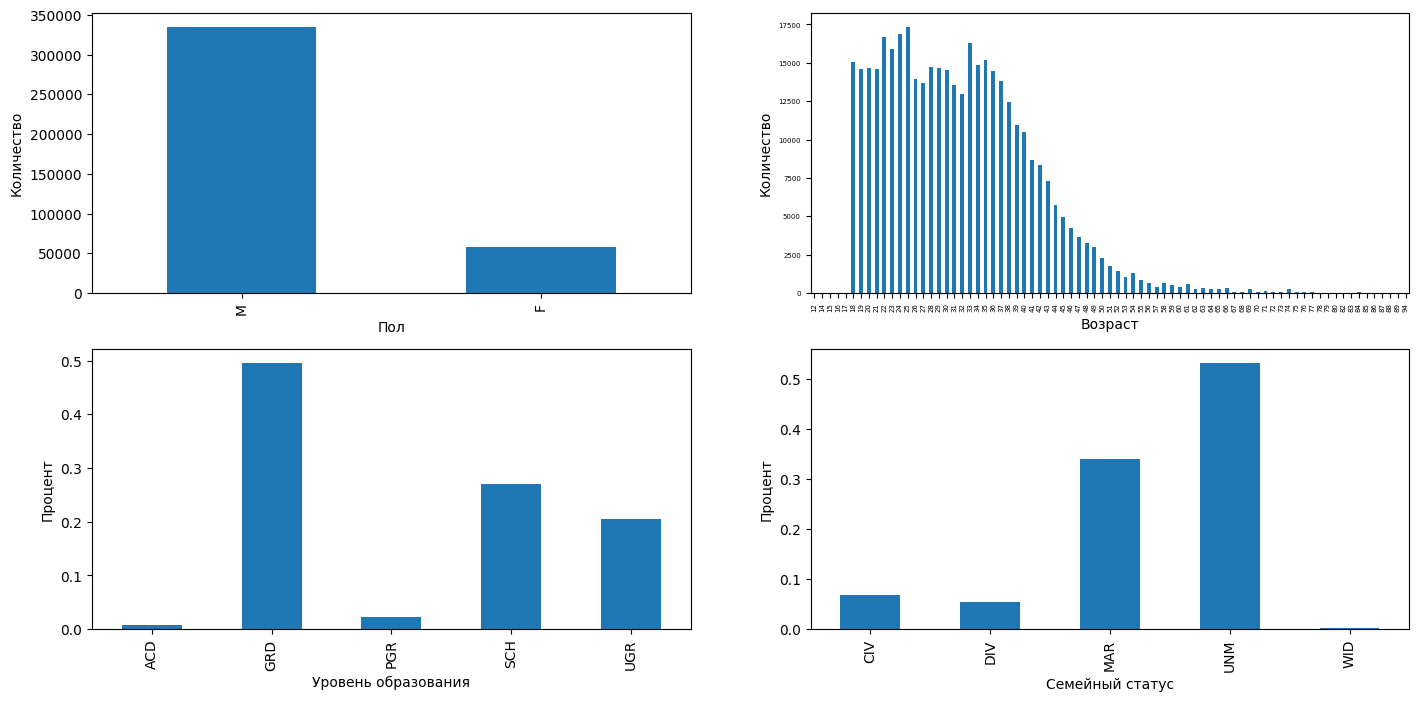

In [68]:
plt.figure(figsize=(17, 8))
plt.subplot(2,2, 1)
data["gender_cd"].value_counts().plot(kind="bar")
plt.xlabel("Пол")
plt.ylabel("Количество")

plt.subplot(2,2, 2)
data["age"].value_counts().sort_index().plot(kind="bar",fontsize=5)
plt.xlabel("Возраст")
plt.ylabel("Количество")


plt.subplot(2,2,3)
DiffByED = data.groupby('education_level_cd')["order_rk"].count()
DiffByED = DiffByED / DiffByED.sum()
DiffByED.plot(kind="bar")
plt.xlabel("Уровень образования")
plt.ylabel("Процент")

plt.subplot(2,2,4)
DiffByMar = data.groupby(data["marital_status_cd"])["order_rk"].count()
DiffByHour = DiffByMar / DiffByMar.sum()
DiffByHour.plot(kind="bar")
plt.xlabel("Семейный статус")
plt.ylabel("Процент")

In [ ]:
### Как видно из графиков большинство пользавателей мужчины в возрасте от 18 до 45 
### имеющие законченное или незаконченное высшее образование, при этом многие находяться вне брака

Text(0, 0.5, 'К-в заказов самоката данной модели')

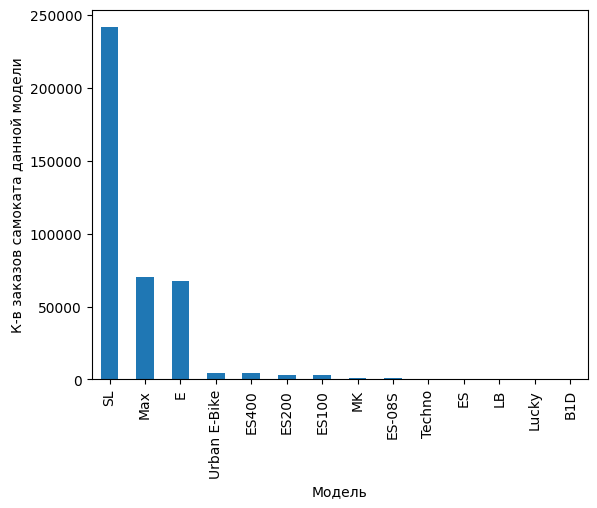

In [69]:
data["transport_model"].value_counts().plot(kind="bar")
plt.xlabel("Модель")
plt.ylabel("К-в заказов самоката данной модели")

Text(0, 0.5, 'Область')

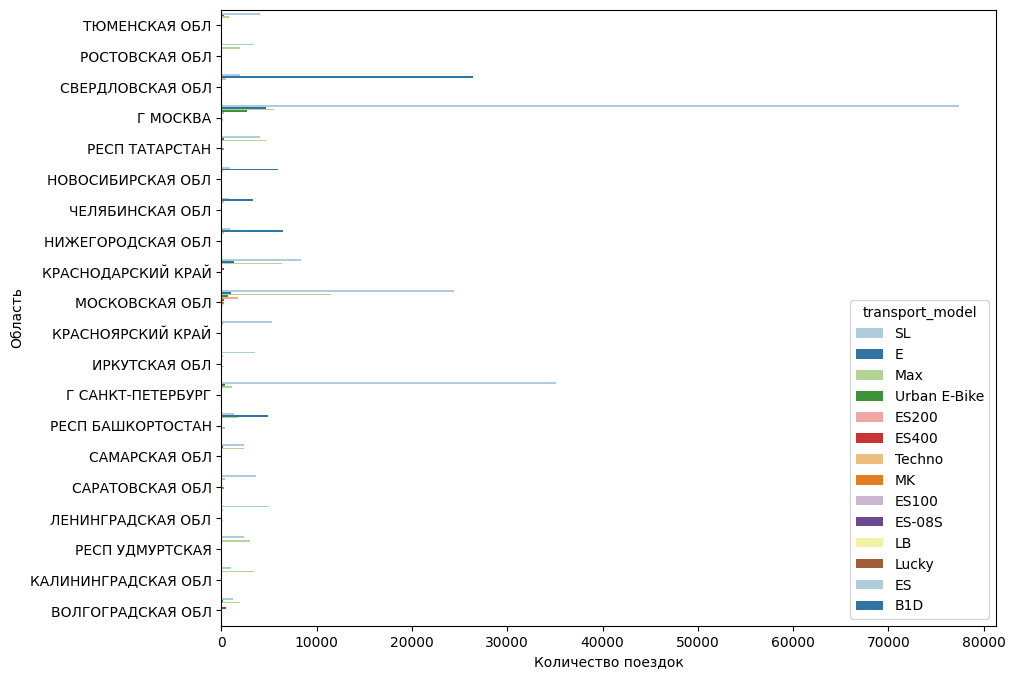

In [ ]:
plt.figure(figsize=(10, 8)) # увеличим размер картинки
top20Region = (data["lvn_state_nm"].value_counts()).head(20)
sns.countplot(y='lvn_state_nm', hue='transport_model',palette="Paired", data=data[data['lvn_state_nm'].isin(top20Region.index)])
plt.xlabel("Количество поездок")
plt.ylabel("Область")


Text(0, 0.5, 'Количество поездок')

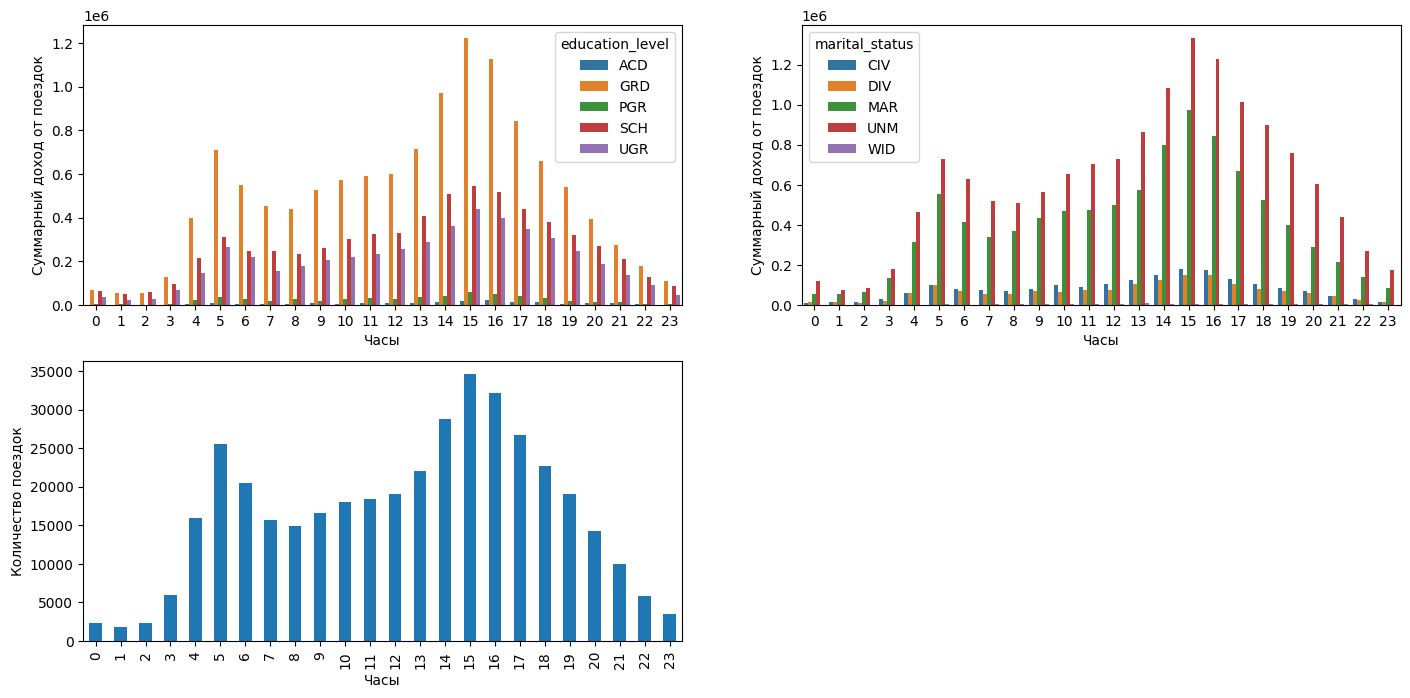

In [71]:
### Дальше я исследовал временные распределения поездок

plt.figure(figsize=(17, 8))


plt.subplot(2,2, 1)
diffByPrEd = pd.DataFrame(data.groupby([data["local_book_start_dttm"].dt.hour, "education_level_cd"])["nominal_price_rub_amt"].sum()).reset_index()
diffByPrEd.columns = ['hour', 'education_level', 'price_sum']
sns.barplot(data=diffByPrEd, x='hour', y='price_sum', hue='education_level')
plt.xlabel("Часы")
plt.ylabel("Суммарный доход от поездок")

plt.subplot(2,2, 2)
diffByHourMar = pd.DataFrame(data.groupby([data["local_book_start_dttm"].dt.hour, "marital_status_cd"])["nominal_price_rub_amt"].sum()).reset_index()
diffByHourMar
diffByHourMar.columns = ['hour', 'marital_status', 'order_count']
sns.barplot(data=diffByHourMar, x='hour', y='order_count', hue='marital_status')
plt.xlabel("Часы")
plt.ylabel("Суммарный доход от поездок")

plt.subplot(2,2, 3)
data["local_book_start_dttm"] = pd.to_datetime(data["local_book_start_dttm"])
DiffByHour = data.groupby(data["local_book_start_dttm"].dt.hour)["order_rk"].count()
DiffByHour.plot(kind="bar")
plt.xlabel("Часы")
plt.ylabel("Количество поездок")



Text(0, 0.5, 'Средняя пройденная дистанция')

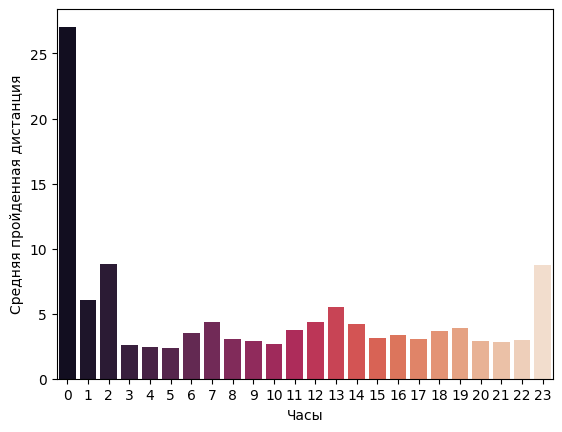

In [72]:
diffByHourD = pd.DataFrame(data.groupby([data["local_book_start_dttm"].dt.hour])["distance_km"].sum() 
                           / data.groupby([data["local_book_start_dttm"].dt.hour])["order_rk"].count()).reset_index()
diffByHourD.columns = ['hour', 'average_distance']
sns.barplot(data=diffByHourD, x='hour', y='average_distance', palette="rocket")
plt.xlabel("Часы")
plt.ylabel("Средняя пройденная дистанция")

<AxesSubplot: title={'center': 'Корреляция части признаков для периода 13-19 часа(Для сравнения)'}>

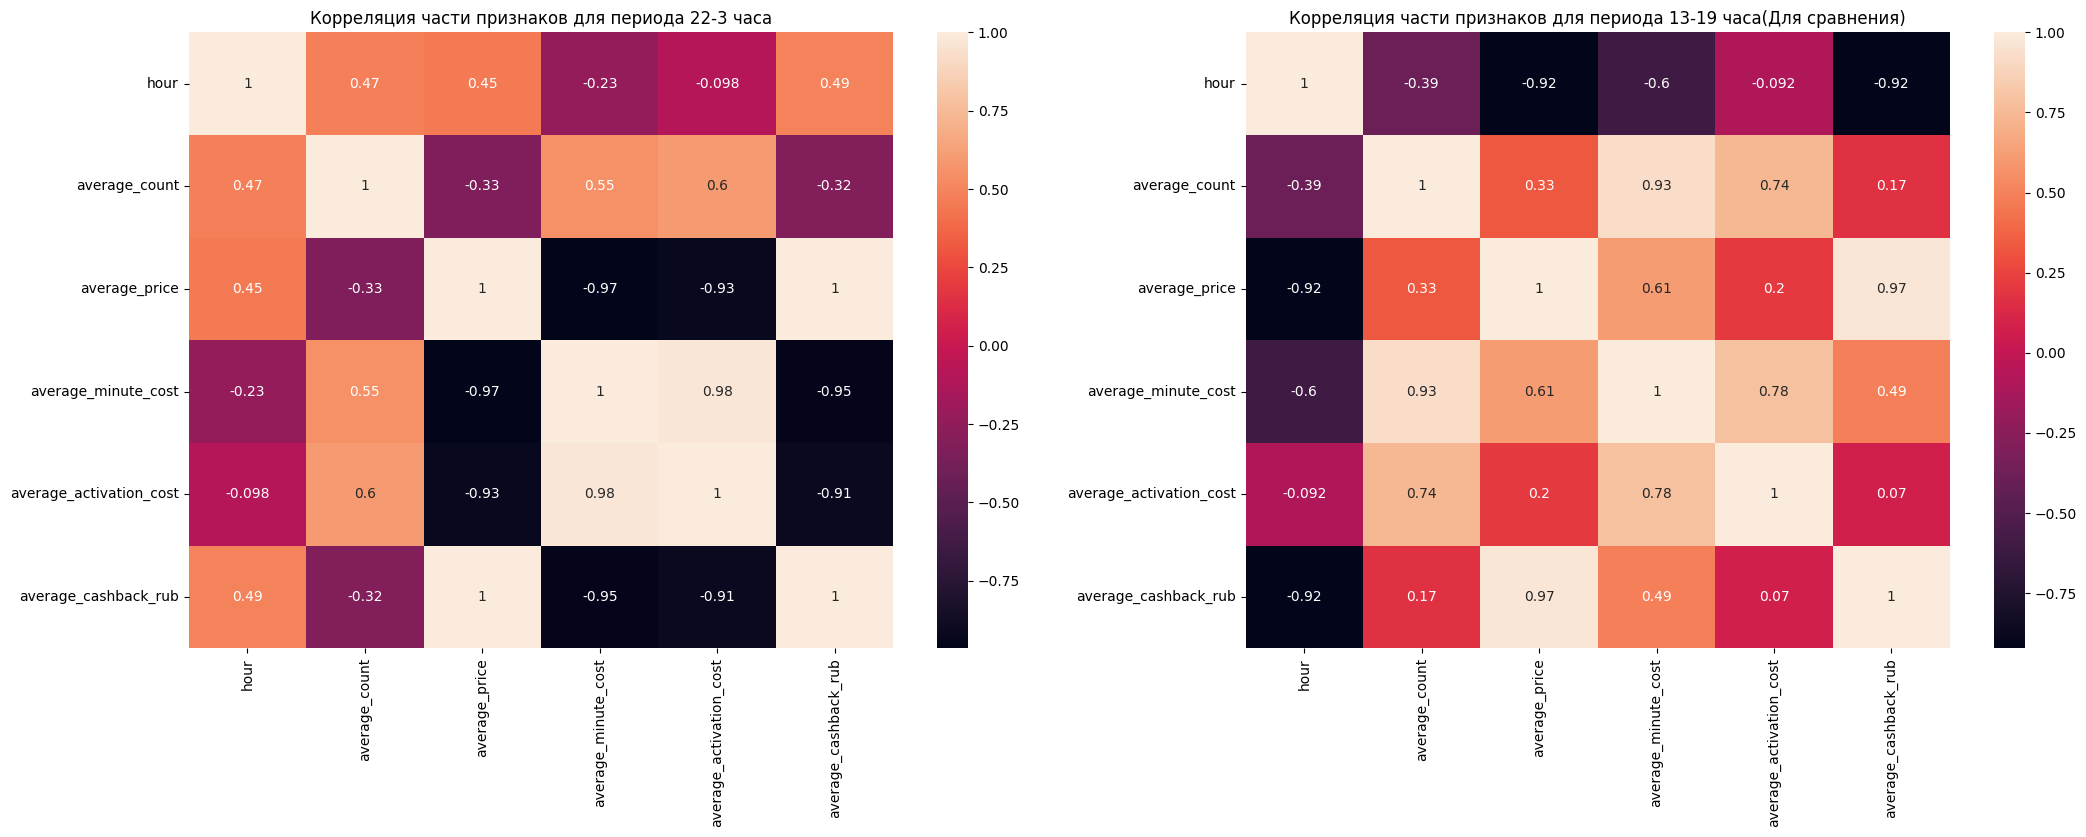

In [ ]:
def CreateTimeDiverse(df, old_names, new_names):
    for name_index in range(len(old_names)):
        df[new_names[name_index]] = data.groupby([data["local_book_start_dttm"].dt.hour])[old_names[name_index]].mean()
         

diffByHourMean = pd.DataFrame(data.groupby([data["local_book_start_dttm"].dt.hour])["order_rk"].count()).reset_index()
diffByHourMean.columns = ['hour', 'average_count']
old_columns = ["nominal_price_rub_amt","minute_cost", "activation_cost", "loyalty_accrual_rub_amt" ]
new_columns = ["average_price", "average_minute_cost", "average_activation_cost", "average_cashback_rub"]
CreateTimeDiverse(diffByHourMean, old_columns, new_columns)




plt.figure(figsize=(25, 8))
plt.subplot(1,2, 1)
sns.heatmap(diffByHourMean.iloc[[22,23, 0, 1, 2, 3], :].corr(method="pearson"), annot = True, fmt=".2g")
plt.title("Корреляция части признаков для периода 22-3 часа")


plt.subplot(1,2, 2)
plt.title("Корреляция части признаков для периода 13-19 часа(Для сравнения)")
sns.heatmap(diffByHourMean.iloc[[13,14,15,16,17,18,19], :].corr(), annot = True, fmt=".2g")

In [ ]:
# Ночной странник: большая скидка на цену активации самоката + специально подсветить такие самокаты